In [6]:
import sys, os, time
import shutil
%pdb
# %load_ext autoreload
# %autoreload 2
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
os.environ['FOUNDATION_SAVE_DIR'] = '/is/ei/fleeb/workspace/chome/trained_nets'
os.environ['FOUNDATION_DATA_DIR'] = '/is/ei/fleeb/workspace/local_data'
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision

from torch.utils.data import Dataset, DataLoader, TensorDataset
import gym
import numpy as np
%matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
# plt.switch_backend('Agg') #('Qt5Agg')
import foundation as fd
from foundation import models
from foundation import util
from foundation import train

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from bisect import bisect_left

# from IPython.display import HTML, Image

#from foundation.util import replicate, Cloner

from hybrid import get_model, get_data
from analyze import *

from tqdm import tqdm_notebook as tqdm

plt.ioff()

np.set_printoptions(linewidth=120, suppress=True)

Automatic pdb calling has been turned OFF


In [7]:
M = Hybrid_Controller().filter_strs('!test')

Found 282 runs
Auto parsing failed with: test-cmd_200202-182019
Auto parsing failed with: test-cmd_200202-182140
Auto parsing failed with: test-cmd_200202-182804
Auto parsing failed with: test-cmd_200202-183508
Auto parsing failed with: test-cmd_200202-192959
Auto parsing failed with: test-cmd_200202-194400
Auto parsing failed with: test-cmd_200202-200904
Auto parsing failed with: test-cmd_200202-201315
Auto parsing failed with: test-cmd_200202-203736
Auto parsing failed with: test-pycharm_200202-162713
Auto parsing failed with: test-pycharm_200202-162914
Auto parsing failed with: test-pycharm_200202-164740
Auto parsing failed with: test-pycharm_200202-170552
Auto parsing failed with: test-pycharm_200202-170706
Auto parsing failed with: test-pycharm_200202-170949
Auto parsing failed with: test-pycharm_200202-171055
Auto parsing failed with: test-pycharm_200202-171241
Auto parsing failed with: test-pycharm_200202-171339
Auto parsing failed with: test-pycharm_200202-171905
Auto parsing f

In [8]:
# M.clear_filters().filter_strs('!test').filter_jobs(167, 168).show_incomplete()

In [9]:
M.clear_run_cache()

In [29]:
M.clear_filters().filter_strs('!test')


# M.filter_jobs(60)
# M.filter_models('ae')
# M.filter_datasets('3dshapes')
# M.filter(lambda r: 'n/adain-dec' in r.config.info.history or 'n/adain-large' in r.config.info.history)
# M.filter_models('wgan')

M.filter_datasets('nocap')
# M.filter_datasets('mpi3d')
# M.filter_datasets('3dshapes')

M.prep_info()
# M.filter_min(ckpt=30)

# M.filter_checkpoints(60)

# M.load_configs(60)

# M.load_configs(100)

M.sort_by('date').sort_by('job')
pass
M.show()


Selecting checkpoint: last
Loaded configs
  0) nocap-ae_0071-6051168-00_200202-201832
  1) nocap-wae_0071-6051168-01_200202-201830
  2) nocap-vae_0071-6051168-02_200202-201832
  3) nocap-vae_0071-6051168-03_200202-201833
  4) nocap-fae_0071-6051168-04_200202-201833
  5) nocap-dae_0071-6051168-05_200202-201834
  6) nocap-fwae_0071-6051168-06_200202-201831
  7) nocap-fvae_0071-6051168-07_200202-202001


In [30]:
# M.prep_info(100)
M.prep_info()
# M.load_records(tqdm)

Selecting checkpoint: last
Loaded configs


In [31]:
M.show('ckpt')

  0) nocap-ae_0071-6051168-00_200202-201832
	Checkpoint: 30 (approx 150000 steps)

  1) nocap-wae_0071-6051168-01_200202-201830
	Checkpoint: 30 (approx 150000 steps)

  2) nocap-vae_0071-6051168-02_200202-201832
	Checkpoint: 30 (approx 150000 steps)

  3) nocap-vae_0071-6051168-03_200202-201833
	Checkpoint: 30 (approx 150000 steps)

  4) nocap-fae_0071-6051168-04_200202-201833
	Checkpoint: 29 (approx 145000 steps)

  5) nocap-dae_0071-6051168-05_200202-201834
	Checkpoint: 19 (approx 95000 steps)

  6) nocap-fwae_0071-6051168-06_200202-201831
	Checkpoint: 30 (approx 150000 steps)

  7) nocap-fvae_0071-6051168-07_200202-202001
	Checkpoint: 30 (approx 150000 steps)



In [32]:
M.clear_run_cache()

In [34]:
M[0].ckpt_path

'/is/ei/fleeb/workspace/chome/trained_nets/nocap-ae_0071-6051168-00_200202-201832/checkpoint_30.pth.tar'

In [33]:
# M.sort_by('job')
# print('\n'.join('unbuffer python main_eval.py --legacy 0 --resume {}'.format(n) for n in M.through().name))
# print('\n'.join('unbuffer python main_eval.py --names {} --save-dir /home/fleeb/results/test'.format(n) for n in M.through().name))
# print('\n'.join('unbuffer python main_eval.py --names {} --save-dir /home/fleeb/results/test'.format(n) for n in M.through().name))
# tmpl= 'unbuffer python hybrid.py n/t/nocap2cap --load {}'#' --model.lr 5e-4'
tmpl= 'unbuffer python hybrid.py --legacy 0 --resume {}'

print('\n'.join(tmpl.format(n) for n in M.through().name))

unbuffer python hybrid.py --legacy 0 --resume nocap-ae_0071-6051168-00_200202-201832
unbuffer python hybrid.py --legacy 0 --resume nocap-wae_0071-6051168-01_200202-201830
unbuffer python hybrid.py --legacy 0 --resume nocap-vae_0071-6051168-02_200202-201832
unbuffer python hybrid.py --legacy 0 --resume nocap-vae_0071-6051168-03_200202-201833
unbuffer python hybrid.py --legacy 0 --resume nocap-fae_0071-6051168-04_200202-201833
unbuffer python hybrid.py --legacy 0 --resume nocap-dae_0071-6051168-05_200202-201834
unbuffer python hybrid.py --legacy 0 --resume nocap-fwae_0071-6051168-06_200202-201831
unbuffer python hybrid.py --legacy 0 --resume nocap-fvae_0071-6051168-07_200202-202001


In [10]:
run = M[1]
run.name

'box-s2-wae_0060-6050841-01_200202-182239'

In [11]:
M.clear_run_cache()

In [12]:
S = run.reset()

In [13]:
# S.A = train.get_config()
# S.A.dataset.name = '3dshapes'
# S.A.dataset.kwargs = {}

In [14]:
# S.bounds = -2,2
run.load(pbar=tqdm)

/is/ei/fleeb/workspace/chome/trained_nets/box-s2-wae_0060-6050841-01_200202-182239/checkpoint_36.pth.tar
True
load successful
Loaded /is/ei/fleeb/workspace/chome/trained_nets/box-s2-wae_0060-6050841-01_200202-182239/checkpoint_36.pth.tar
Set dataroot to: /is/ei/fleeb/workspace/local_data
  datasets (type=list): 
  Creating (0) (type=dataset/byfactor) (mod=resamplable)
    budget: 600
    factor: shape (in parent)
    vals: None (by default)
    counts: [-1, 0, 0, 0]
    seeds: None (by default)
    det: True (by default)
    labeled: False
    dataroot: /is/ei/fleeb/workspace/local_data (in parent)
    load_memory: True (by default)
    train: True (in parent)
    labeled: True
    noise: None (by default)
    din: (3, 64, 64) (by default)
    dout: 6 (by default)
Filtering out 287906/384000 samples
  Creating (1) (type=dataset/byfactor)
    factor: shape (in parent)
    vals: None (by default)
    counts: [0, 600, 0, 0]
    seeds: None (by default)
    det: True (by default)
    label

In [15]:
run.run(pbar=tqdm)

/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


Using 180 samples



Storing 180 latent vectors


In [16]:
S.ckpt_path

'/is/ei/fleeb/workspace/chome/trained_nets/box-s2-wae_0060-6050841-01_200202-182239/checkpoint_36.pth.tar'

In [17]:
viz = run.visualize(tqdm)
len(viz), viz.keys()

(7,
 dict_keys(['original', 'recs', 'gens', 'hybrid', 'latent', 'effects', 'traversals']))

<IPython.core.display.Javascript object>


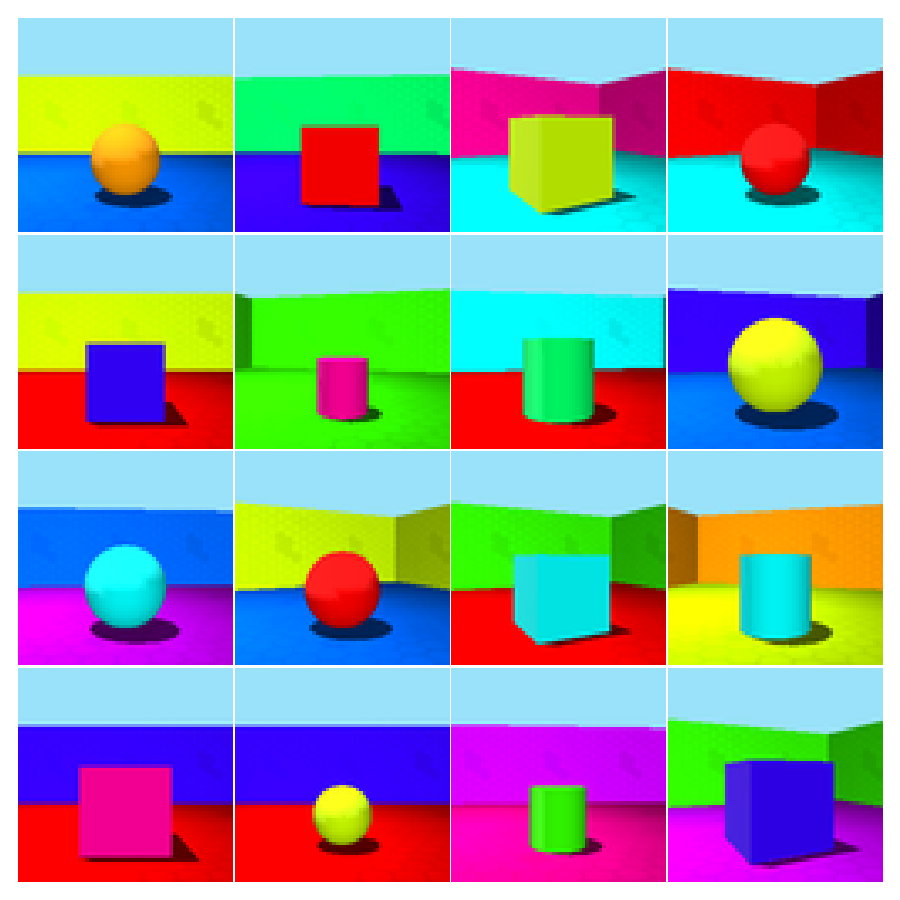

In [18]:
viz['original'][0].view(scale=2)

<IPython.core.display.Javascript object>


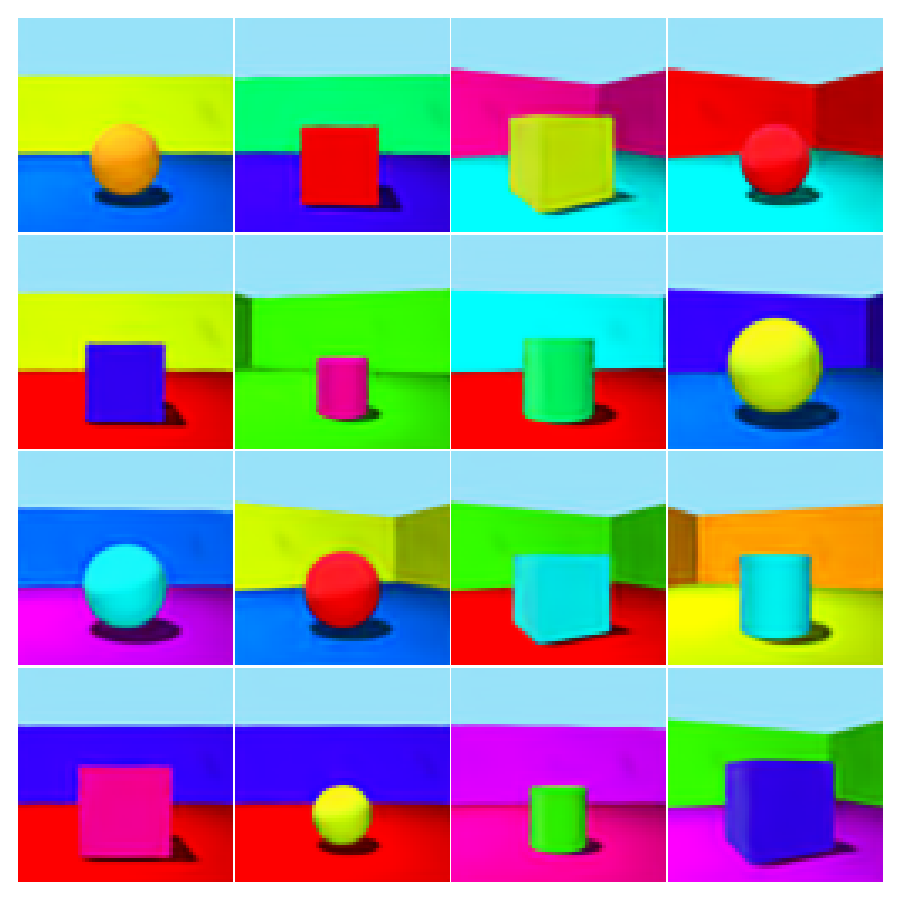

In [19]:
viz['recs'][0].view(scale=2)

<IPython.core.display.Javascript object>


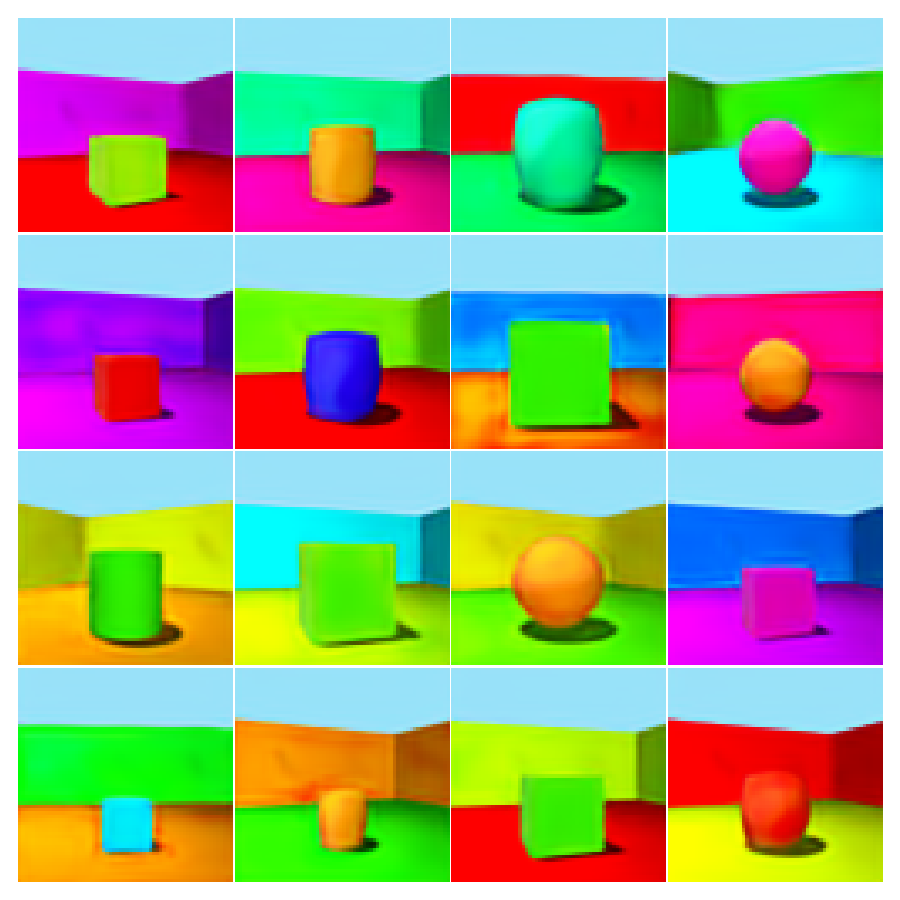

In [20]:
viz['hybrid'][0].view(scale=2)

<IPython.core.display.Javascript object>


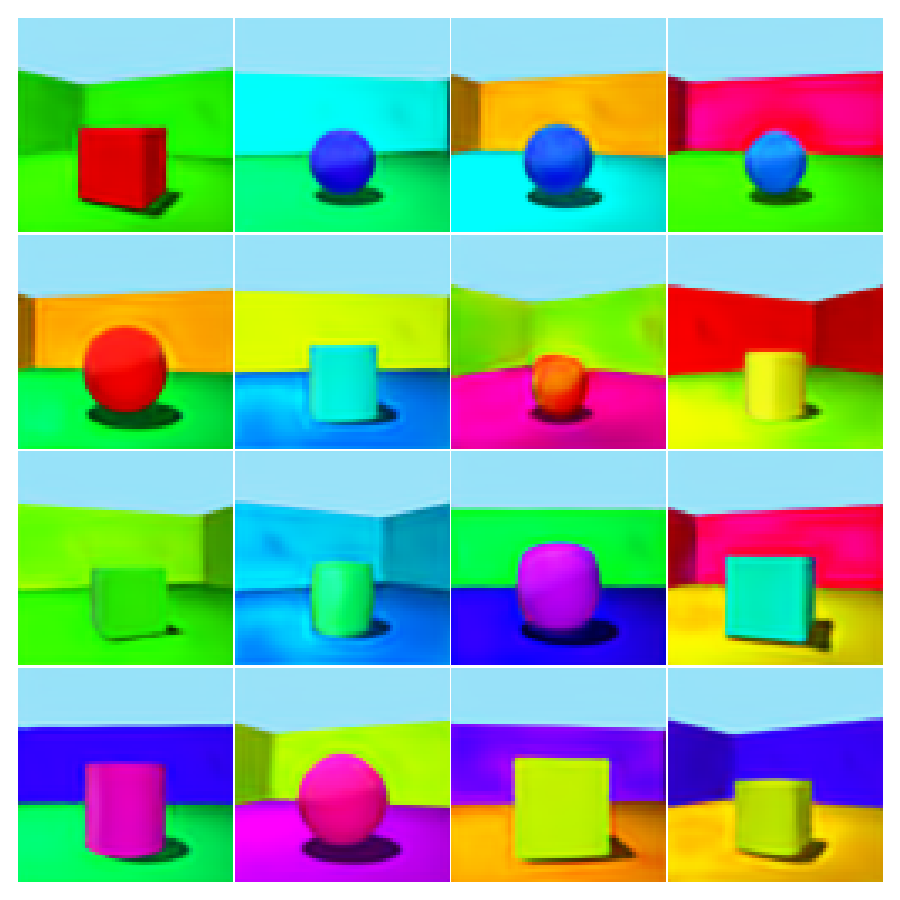

In [21]:
viz['gens'][0].view(scale=2)

In [22]:
viz['traversals'][0].view(scale=2)

<IPython.core.display.Javascript object>


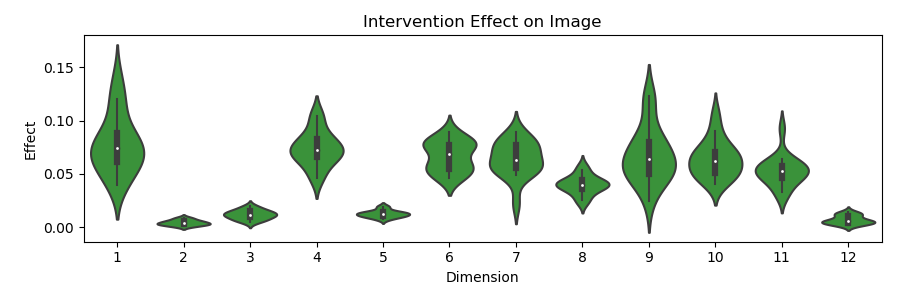

In [23]:
viz['effects'][0].view(scale=2)

<IPython.core.display.Javascript object>


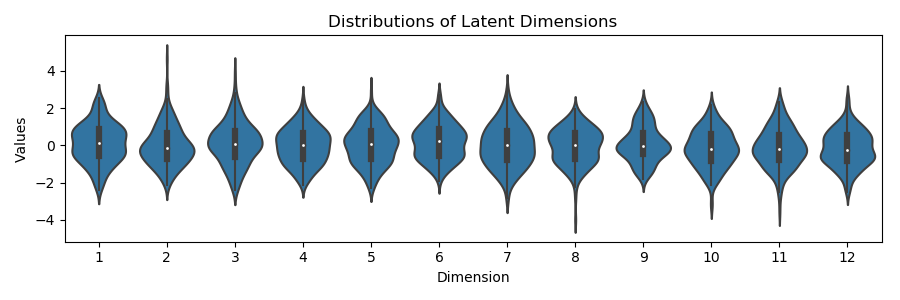

In [24]:
fig = viz['latent'][0].view(scale=2)
# # plt.figure(fig.number)
# # ax = fig.get_axes()[0]
# # ax.set_ylim(-3, 3)
fig

In [25]:
evals = run.evaluate(pbar=tqdm)

--- Evaluating: FID-prior


/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))



Updated 1 keys: ['fid_gen_stats']
Saved updated checkpoint to: /is/ei/fleeb/workspace/chome/trained_nets/box-s2-wae_0060-6050841-01_200202-182239/checkpoint_36.pth.tar
... took: 133.09
FID-prior: 48.7291286935739

--- Evaluating: FID-hyb



Updated 1 keys: ['fid_gen_stats']
Saved updated checkpoint to: /is/ei/fleeb/workspace/chome/trained_nets/box-s2-wae_0060-6050841-01_200202-182239/checkpoint_36.pth.tar
... took: 135.55
FID-hyb: 48.35008771077818

--- Evaluating: FID-rec



Updated 1 keys: ['fid_gen_stats']
Saved updated checkpoint to: /is/ei/fleeb/workspace/chome/trained_nets/box-s2-wae_0060-6050841-01_200202-182239/checkpoint_36.pth.tar
... took: 136.65
FID-rec: 60.47693700407177

--- Evaluating: IRS
dataroot: /is/ei/fleeb/workspace/local_data
load_memory: True (by default)
train: None
labeled: True
noise: None (by default)
din: (3, 64, 64) (by default)
dout: 6 (by default)
... took: 29.38
IRS: {'IRS': 0.5825183190965662, 'num_active_dims': 54.57351}

--- Evaluating: MIG
... took: 1.63
MIG: {'discrete_mig': 0.06211740299028601}

--- Evaluating: DCI
... took: 59.85
DCI: {'informativeness_train': 0.8862, 'informativeness_test': 0.7273333333333333, 'disentanglement': 0.35687589071794945, 'completeness': 0.26959389337903306}

--- Evaluating: SAP
... took: 4.44
SAP: {'SAP_score': 0.02946666666666666}

--- Evaluating: ModExp


/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/is/ei/fleeb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/lo

... took: 3.51
ModExp: {'modularity_score': 0.8928007350030239, 'explicitness_score_train': 0.9613200609676952, 'explicitness_score_test': 0.9585571851988708}

--- Evaluating: Unsup
... took: 1.77
Unsup: {'gaussian_total_correlation': 0.15289144557207918, 'gaussian_wasserstein_correlation': 0.16531226654711162, 'gaussian_wasserstein_correlation_norm': 0.013429335277146534, 'mutual_info_score': 0.04972977019554305}



In [26]:
update_checkpoint(S, 'evals', overwrite=True)

Updated 1 keys: ['evals']
Saved updated checkpoint to: /is/ei/fleeb/workspace/chome/trained_nets/box-s2-wae_0060-6050841-01_200202-182239/checkpoint_36.pth.tar


In [27]:
# 'FID-prior': 52.483717550697236,
#  'FID-hyb': 51.906775365647974,
#  'FID-rec': 38.42281377504153,

In [28]:
# run.ckpt_path

In [29]:
# run.meta.history

In [30]:
# print(run.state.model)

In [31]:
# S.keys()

In [32]:
# S.hello = 'world'

In [33]:
# update_checkpoint(S, 'hello')

In [34]:
# viz_

In [35]:
# S.fid_gen_stats.keys()

In [36]:
# update_checkpoint(S, 'fid_gen_stats', overwrite=True)

In [37]:
# import pickle

In [38]:
# path = os.path.join(os.environ["FOUNDATION_DATA_DIR"], '3dshapes', '3dshapes_stats_fid.pkl')
# f = pickle.load(open(path,'rb'))

In [39]:
# f

In [40]:
# run.state.keys()

In [41]:
# model = run.state.model

In [42]:
# q = run.state.q
# q.shape

In [43]:
# with torch.no_grad():
#     imgs = model.decode(q.div(100))
# imgs.shape

In [44]:
# show_nums(imgs)

In [45]:
media_root = '/is/ei/fleeb/workspace/media/hybrid/gans/'
run.save(media_root, overwrite=True)

Saving results to: /is/ei/fleeb/workspace/media/hybrid/gans/box-s2-wae_0060-6050841-01_200202-182239_ckpt36
	Model saved
	Config saved
	Visualization saved
	Evaluation saved
	Results saved: val_Q


'/is/ei/fleeb/workspace/media/hybrid/gans/box-s2-wae_0060-6050841-01_200202-182239_ckpt36'